# Tennis

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
import sys
print(sys.version)

3.6.3 |Anaconda, Inc.| (default, Dec  5 2017, 17:30:25) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

env = UnityEnvironment(file_name='/Users/hunterkempf/Downloads/Tennis.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [6]:
from ddpg_agent import Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=1842)

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [7]:
from itertools import count
import time
def ddpg(n_episodes=5000,max_n_timesteps = 5000,rolling_window_size=100,target_average=0.5):
    scores_deque = deque(maxlen=rolling_window_size)
    average_score_history = []
    rolling_average_history = []
    max_score_history = []
    min_score_history = []
    start_time = time.time()
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        agent.reset()
        for t_step in range(max_n_timesteps):
            first_agent_action = agent.act(states[0])
            second_agent_action = agent.act(states[1])
            actions = np.array([first_agent_action,second_agent_action])
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            agent.step(states, actions, rewards, next_states, dones,t_step)
            states = next_states                               # roll over states to next time step
            scores += rewards                                  # update the score (for each agent)            
            if np.any(dones):                                  # exit loop if episode finished
                break
        
        score = np.mean(scores)
        scores_deque.append(score)
        last_n_score_average = np.mean(scores_deque)
        rolling_average_history.append(last_n_score_average)
        average_score_history.append(score)
        max_score_history.append(np.max(scores))
        min_score_history.append(np.min(scores))
        torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
        torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        print('\rEpisode {} Time: {:.2f} min, Statistics --> Average: {:.2f}, Max: {:.2f}, Min: {:.2f}, StDev: {:.2f} Rolling Average: {:.2f}'\
              .format(i_episode,(time.time()-start_time)/60, score, np.max(scores), np.min(scores),np.std(scores), last_n_score_average))        
        if i_episode % rolling_window_size == 0:
            print('\rEpisode {}\t Score Statistics on Rolling {} Episodes -> Average: {:.5f} Max: {:.5f},\n\t Min: {:.5f}, StDev: {:.5f}'\
                  .format(i_episode,rolling_window_size, np.mean(scores_deque),np.max(scores_deque), np.min(scores_deque),np.std(scores_deque)))   
        if last_n_score_average>target_average:
            break
            
    return average_score_history,rolling_average_history, max_score_history, min_score_history

average_score_history,rolling_average_history, max_score_history, min_score_history = ddpg()

Episode 1 Time: 0.01 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: -0.00
Episode 2 Time: 0.01 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: -0.00
Episode 3 Time: 0.01 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: -0.00
Episode 4 Time: 0.01 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: -0.00
Episode 5 Time: 0.01 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: -0.00
Episode 6 Time: 0.01 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: -0.00
Episode 7 Time: 0.01 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: -0.00
Episode 8 Time: 0.02 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: -0.00
Episode 9 Time: 0.02 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, 

Episode 73 Time: 6.08 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.01
Episode 74 Time: 6.15 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.01
Episode 75 Time: 6.35 min, Statistics --> Average: 0.15, Max: 0.19, Min: 0.10, StDev: 0.05 Rolling Average: 0.02
Episode 76 Time: 6.49 min, Statistics --> Average: 0.05, Max: 0.09, Min: 0.00, StDev: 0.05 Rolling Average: 0.02
Episode 77 Time: 6.73 min, Statistics --> Average: 0.10, Max: 0.10, Min: 0.09, StDev: 0.00 Rolling Average: 0.02
Episode 78 Time: 6.88 min, Statistics --> Average: 0.05, Max: 0.10, Min: -0.01, StDev: 0.06 Rolling Average: 0.02
Episode 79 Time: 6.94 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.02
Episode 80 Time: 7.08 min, Statistics --> Average: 0.05, Max: 0.10, Min: -0.01, StDev: 0.06 Rolling Average: 0.02
Episode 81 Time: 7.15 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 

Episode 144 Time: 17.59 min, Statistics --> Average: 0.05, Max: 0.09, Min: 0.00, StDev: 0.05 Rolling Average: 0.05
Episode 145 Time: 17.91 min, Statistics --> Average: 0.14, Max: 0.20, Min: 0.08, StDev: 0.06 Rolling Average: 0.05
Episode 146 Time: 17.97 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.05
Episode 147 Time: 18.11 min, Statistics --> Average: 0.05, Max: 0.09, Min: 0.00, StDev: 0.05 Rolling Average: 0.05
Episode 148 Time: 18.24 min, Statistics --> Average: 0.05, Max: 0.09, Min: 0.00, StDev: 0.05 Rolling Average: 0.05
Episode 149 Time: 18.39 min, Statistics --> Average: 0.05, Max: 0.10, Min: -0.01, StDev: 0.06 Rolling Average: 0.05
Episode 150 Time: 18.71 min, Statistics --> Average: 0.10, Max: 0.10, Min: 0.09, StDev: 0.00 Rolling Average: 0.05
Episode 151 Time: 18.77 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.05
Episode 152 Time: 18.98 min, Statistics --> Average: 0.10, Max: 0.10, Min: 

Episode 214 Time: 34.20 min, Statistics --> Average: 0.05, Max: 0.10, Min: -0.01, StDev: 0.06 Rolling Average: 0.08
Episode 215 Time: 34.26 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.08
Episode 216 Time: 34.58 min, Statistics --> Average: 0.15, Max: 0.20, Min: 0.09, StDev: 0.06 Rolling Average: 0.08
Episode 217 Time: 34.72 min, Statistics --> Average: 0.05, Max: 0.09, Min: 0.00, StDev: 0.05 Rolling Average: 0.08
Episode 218 Time: 34.96 min, Statistics --> Average: 0.05, Max: 0.10, Min: -0.01, StDev: 0.06 Rolling Average: 0.08
Episode 219 Time: 35.21 min, Statistics --> Average: 0.10, Max: 0.10, Min: 0.09, StDev: 0.00 Rolling Average: 0.08
Episode 220 Time: 35.46 min, Statistics --> Average: 0.10, Max: 0.10, Min: 0.09, StDev: 0.00 Rolling Average: 0.08
Episode 221 Time: 35.53 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.08
Episode 222 Time: 35.59 min, Statistics --> Average: -0.00, Max: 0.00, Min

Episode 285 Time: 68.76 min, Statistics --> Average: 0.80, Max: 0.80, Min: 0.79, StDev: 0.00 Rolling Average: 0.20
Episode 286 Time: 68.92 min, Statistics --> Average: 0.05, Max: 0.10, Min: -0.01, StDev: 0.06 Rolling Average: 0.20
Episode 287 Time: 69.53 min, Statistics --> Average: 0.30, Max: 0.30, Min: 0.29, StDev: 0.00 Rolling Average: 0.20
Episode 288 Time: 69.85 min, Statistics --> Average: 0.15, Max: 0.20, Min: 0.09, StDev: 0.06 Rolling Average: 0.20
Episode 289 Time: 73.08 min, Statistics --> Average: 1.80, Max: 1.80, Min: 1.79, StDev: 0.00 Rolling Average: 0.22
Episode 290 Time: 73.32 min, Statistics --> Average: 0.05, Max: 0.10, Min: -0.01, StDev: 0.06 Rolling Average: 0.22
Episode 291 Time: 73.60 min, Statistics --> Average: 0.10, Max: 0.10, Min: 0.09, StDev: 0.00 Rolling Average: 0.22
Episode 292 Time: 75.31 min, Statistics --> Average: 0.95, Max: 1.00, Min: 0.89, StDev: 0.06 Rolling Average: 0.22
Episode 293 Time: 75.55 min, Statistics --> Average: 0.10, Max: 0.10, Min: 0.0

Episode 355 Time: 101.53 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.21
Episode 356 Time: 101.84 min, Statistics --> Average: 0.15, Max: 0.19, Min: 0.10, StDev: 0.05 Rolling Average: 0.21
Episode 357 Time: 101.91 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.21
Episode 358 Time: 102.59 min, Statistics --> Average: 0.30, Max: 0.30, Min: 0.29, StDev: 0.00 Rolling Average: 0.21
Episode 359 Time: 103.31 min, Statistics --> Average: 0.35, Max: 0.40, Min: 0.29, StDev: 0.06 Rolling Average: 0.21
Episode 360 Time: 103.38 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.21
Episode 361 Time: 104.82 min, Statistics --> Average: 0.75, Max: 0.80, Min: 0.69, StDev: 0.06 Rolling Average: 0.21
Episode 362 Time: 104.97 min, Statistics --> Average: 0.05, Max: 0.10, Min: -0.01, StDev: 0.06 Rolling Average: 0.21
Episode 363 Time: 105.46 min, Statistics --> Average: 0.25, Max: 

Episode 425 Time: 139.36 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.24
Episode 426 Time: 139.43 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.24
Episode 427 Time: 139.76 min, Statistics --> Average: 0.15, Max: 0.20, Min: 0.09, StDev: 0.06 Rolling Average: 0.24
Episode 428 Time: 139.92 min, Statistics --> Average: 0.05, Max: 0.10, Min: -0.01, StDev: 0.06 Rolling Average: 0.24
Episode 429 Time: 139.99 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.23
Episode 430 Time: 140.24 min, Statistics --> Average: 0.10, Max: 0.10, Min: 0.09, StDev: 0.00 Rolling Average: 0.23
Episode 431 Time: 140.57 min, Statistics --> Average: 0.15, Max: 0.19, Min: 0.10, StDev: 0.05 Rolling Average: 0.23
Episode 432 Time: 140.64 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.23
Episode 433 Time: 140.92 min, Statistics --> Average: 0.10, Max

Episode 496 Time: 166.44 min, Statistics --> Average: 0.30, Max: 0.30, Min: 0.29, StDev: 0.00 Rolling Average: 0.21
Episode 497 Time: 166.86 min, Statistics --> Average: 0.20, Max: 0.20, Min: 0.19, StDev: 0.00 Rolling Average: 0.21
Episode 498 Time: 166.92 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.20
Episode 499 Time: 166.99 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.20
Episode 500 Time: 167.30 min, Statistics --> Average: 0.10, Max: 0.10, Min: 0.09, StDev: 0.00 Rolling Average: 0.20
Episode 500	 Score Statistics on Rolling 100 Episodes -> Average: 0.19700 Max: 1.24500,
	 Min: -0.00500, StDev: 0.21942
Episode 501 Time: 167.63 min, Statistics --> Average: 0.15, Max: 0.20, Min: 0.09, StDev: 0.06 Rolling Average: 0.20
Episode 502 Time: 168.37 min, Statistics --> Average: 0.30, Max: 0.30, Min: 0.29, StDev: 0.00 Rolling Average: 0.20
Episode 503 Time: 168.51 min, Statistics --> Average: 0.05, Max:

Episode 566 Time: 199.02 min, Statistics --> Average: 0.35, Max: 0.40, Min: 0.29, StDev: 0.06 Rolling Average: 0.19
Episode 567 Time: 200.08 min, Statistics --> Average: 0.55, Max: 0.60, Min: 0.49, StDev: 0.06 Rolling Average: 0.19
Episode 568 Time: 200.14 min, Statistics --> Average: -0.00, Max: 0.00, Min: -0.01, StDev: 0.00 Rolling Average: 0.19
Episode 569 Time: 200.59 min, Statistics --> Average: 0.20, Max: 0.20, Min: 0.19, StDev: 0.00 Rolling Average: 0.19
Episode 570 Time: 200.92 min, Statistics --> Average: 0.15, Max: 0.20, Min: 0.09, StDev: 0.06 Rolling Average: 0.19
Episode 571 Time: 201.65 min, Statistics --> Average: 0.35, Max: 0.40, Min: 0.29, StDev: 0.06 Rolling Average: 0.19
Episode 572 Time: 202.09 min, Statistics --> Average: 0.20, Max: 0.20, Min: 0.19, StDev: 0.00 Rolling Average: 0.20
Episode 573 Time: 202.35 min, Statistics --> Average: 0.10, Max: 0.10, Min: 0.09, StDev: 0.00 Rolling Average: 0.20
Episode 574 Time: 203.50 min, Statistics --> Average: 0.60, Max: 0.60,

Episode 636 Time: 278.64 min, Statistics --> Average: 1.95, Max: 1.99, Min: 1.90, StDev: 0.05 Rolling Average: 0.34
Episode 637 Time: 279.04 min, Statistics --> Average: 0.15, Max: 0.20, Min: 0.09, StDev: 0.06 Rolling Average: 0.34
Episode 638 Time: 280.22 min, Statistics --> Average: 0.55, Max: 0.60, Min: 0.49, StDev: 0.06 Rolling Average: 0.34
Episode 639 Time: 281.37 min, Statistics --> Average: 0.60, Max: 0.60, Min: 0.59, StDev: 0.00 Rolling Average: 0.34
Episode 640 Time: 283.60 min, Statistics --> Average: 1.10, Max: 1.10, Min: 1.09, StDev: 0.00 Rolling Average: 0.35
Episode 641 Time: 288.35 min, Statistics --> Average: 2.50, Max: 2.50, Min: 2.50, StDev: 0.00 Rolling Average: 0.37
Episode 642 Time: 291.29 min, Statistics --> Average: 1.55, Max: 1.60, Min: 1.49, StDev: 0.06 Rolling Average: 0.39
Episode 643 Time: 291.65 min, Statistics --> Average: 0.15, Max: 0.20, Min: 0.09, StDev: 0.06 Rolling Average: 0.39
Episode 644 Time: 292.78 min, Statistics --> Average: 0.55, Max: 0.60, M

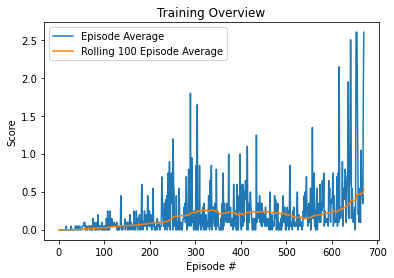

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(average_score_history)+1), average_score_history, label="Episode Average")
plt.plot(np.arange(1, len(rolling_average_history)+1), rolling_average_history, label="Rolling 100 Episode Average")
plt.legend(loc='upper left')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title('Training Overview')
plt.show()

When finished, you can close the environment.

In [9]:
env.close()